### Density-based spatial clustering of applications with noise (DBSCAN)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from IPython.display import display
import sklearn
from sklearn import metrics # for evaluations  
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
%matplotlib inline

### Drawback of K-means: Cannot handle non-spherical data

> *K-means* clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with **the nearest mean**. (Wikipedia) 

Since the concentric circles would have the approximately same mean, so k-means is not suitable to separate them.

Let's generate non-spherical data and plot the ground truths of clusters.

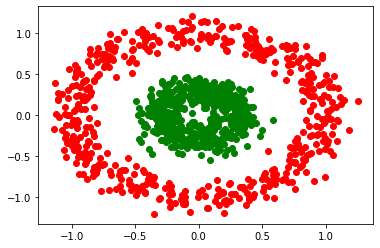

In [3]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

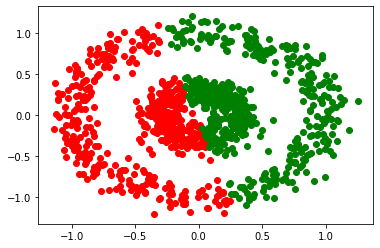

In [4]:
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

## DBSCAN: Density-Based Spatial Clustering of Applications with Noise

### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.

### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

<div style="text-align:center"><img width="300px" src="img/core-border-point.png"/></div>


- Directly density-reachable: A point $p$ is **directly density-reachable** from a point $q$ w.r.t $Eps$ and $MinPts$ if:
    - $p \in N_{Eps}(q)$, and $q$ is a **core point**.
    - $p$ **doesn't** need to be a core point.

<div style="text-align:center"><img width="250px" src="img/directly-density-reachable.png"/></div>

- Density-reachable: A point $p$ is **density-reachable** from a point $q$ w.r.t. $Eps$ and $MinPts$ if there is a chain of points $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ such that $p_{i+1}$ is directly density-reachable from $p_i$.

<div style="text-align:center"><img width="150px" src="img/density-reachable.png"/></div>

### The Algorithm
1. Randomly choose a point $p$.
2. Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
3. If $p$ is a core point, a cluster is formed.
4. If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
5. Repeat the process until all the data points have been processed.

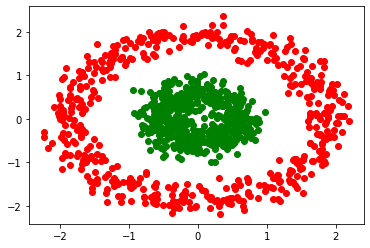

In [5]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')


### Please complete the following tasks:
- Implement *DBSCAN* algorithm yourself.
- Apply the implemented *DBSCAN* algorithm on the given training data.
- Plot the clusters.

In [6]:
     
def set2List(NumpyArray):
    list = []
    for item in NumpyArray:
        list.append(item.tolist())
    return list

In [7]:
def DBSCAN(Dataset, Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
    m,n=Dataset.shape
    Visited=np.zeros(m,'int')
    Type=np.zeros(m)
    ClustersList=[]
    Cluster=[]
    PointClusterNumber=np.zeros(m)
    PointClusterNumberIndex=1
    PointNeighbors=[]
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
    for i in range(m):
        if Visited[i]==0:
            Visited[i]=1
            PointNeighbors=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(PointNeighbors)<MinumumPoints:
                Type[i]=-1
            else:
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
                
                
                PointNeighbors=set2List(PointNeighbors)    
                ExpandClsuter(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1
                 
                    
    return PointClusterNumber 


In [8]:
def ExpandClsuter(PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]
    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=np.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            Cluster.append(i)
            PointClusterNumber[i]=PointClusterNumberIndex
    return


array([1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2.,
       2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2.,
       1., 1., 2., 2., 1., 2., 1., 1., 0., 1., 2., 2., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
       2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2.,
       2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
       2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 2., 1.

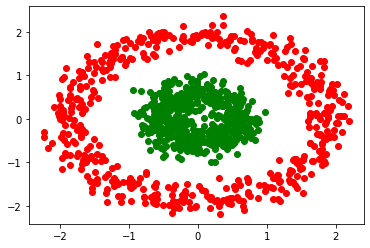

In [9]:
Epsilon=0.3
MinumumPoints=10
y_pred =DBSCAN(X,Epsilon,MinumumPoints)

plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'ro')
plt.plot(X[y_pred == 2, 0], X[y_pred == 2, 1], 'go')
y_pred